In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


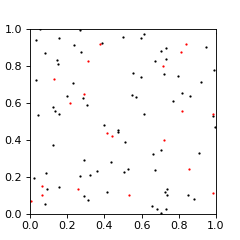

<IPython.core.display.Javascript object>


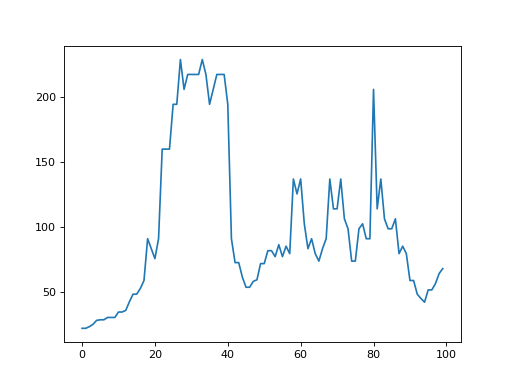

In [7]:
%matplotlib notebook

n_animals = 100
n_steps = 100
vmin=0.01
vmax=0.05
trap_size = 0.4

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(low=vmin,high=vmax,size=n_animals)*(2*np.random.randint(low=0,high=2,size=n_animals)-1)
vy = np.random.uniform(low=vmin,high=vmax,size=n_animals)*(2*np.random.randint(low=0,high=2,size=n_animals)-1)
color = np.where(np.logical_and(x<trap_size,y<trap_size),1,0)
n_marked = np.sum(color)
estimation = np.zeros(n_steps)

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(n_steps): # moving elks around
    
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x>1,x<0),-vx,vx)
    vy = np.where(np.logical_or(y>1,y<0),-vy,vy)
    
    n_recaptured_total = np.sum(np.logical_and(x<trap_size,y<trap_size))
    n_recaptured_marked = np.sum(np.logical_and(x<trap_size,y<trap_size)*color)
    estimation[t] = (n_marked + 1)/(n_recaptured_marked + 1)*(n_recaptured_total+1)-1
    
    ax.clear()
    plt.plot(x[color==0],y[color==0],'k.',markersize=2);
    plt.plot(x[color==1],y[color==1],'r.',markersize=2);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() # <--------------- The main command to make it move
    #time.sleep(0.01)
    
plt.figure();
plt.plot(estimation);